In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['muros', 'palabuhanratu', 'kapaa', 'albany', 'new norfolk', 'punta arenas', 'coos bay', 'say', 'chuy', 'kodiak', 'port alfred', 'jamestown', 'alofi', 'jubb jannin', 'tasiilaq', 'iskateley', 'butaritari', 'rikitea', 'mataura', 'mahebourg', 'pevek', 'taolanaro', 'castro', 'banda aceh', 'qaqortoq', 'east london', 'longyearbyen', 'nikolskoye', 'agadez', 'carnarvon', 'vaini', 'yellowknife', 'oneonta', 'takoradi', 'barrow', 'hilo', 'andrelandia', 'ingham', 'katsuura', 'mehamn', 'severo-kurilsk', 'san patricio', 'busselton', 'paamiut', 'hermanus', 'bethel', 'upernavik', 'meulaboh', 'skalistyy', 'naral', 'ushuaia', 'port hardy', 'lufilufi', 'rincon', 'saskylakh', 'amderma', 'meyungs', 'aasiaat', 'roebourne', 'miandrivazo', 'kapit', 'ilulissat', 'kavieng', 'mount gambier', 'iqaluit', 'maceio', 'mushie', 'codrington', 'provideniya', 'caravelas', 'cabo san lucas', 'puerto ayora', 'imbituba', 'tyukalinsk', 'khatanga', 'marcona', 'grootfontein', 'vao', 'ancud', 'richards bay', 'karratha', 'bluff',

In [53]:
# # Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url and request results
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
# Set temperature from response
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country =[]
city_name = []
lat = []
lng = []
index_counter = 0
set_counter = 1
# Create for loop for temperatures in city list
for city in cities:
    try:      
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter +1
        
        else:
            index_counter = index_counter + 1
            
        print(f'Processing record {index_counter} of set {set_counter} : {city}')
       
        
    except (KeyError, IndexError):
        print('City not found')
        


Processing record 1 of set 1 : muros
City not found
Processing record 2 of set 1 : kapaa
Processing record 3 of set 1 : albany
Processing record 4 of set 1 : new norfolk
Processing record 5 of set 1 : punta arenas
Processing record 6 of set 1 : coos bay
Processing record 7 of set 1 : say
Processing record 8 of set 1 : chuy
Processing record 9 of set 1 : kodiak
Processing record 10 of set 1 : port alfred
Processing record 11 of set 1 : jamestown
Processing record 12 of set 1 : alofi
City not found
Processing record 13 of set 1 : tasiilaq
Processing record 14 of set 1 : iskateley
Processing record 15 of set 1 : butaritari
Processing record 16 of set 1 : rikitea
Processing record 17 of set 1 : mataura
Processing record 18 of set 1 : mahebourg
Processing record 19 of set 1 : pevek
City not found
Processing record 20 of set 1 : castro
Processing record 21 of set 1 : banda aceh
Processing record 22 of set 1 : qaqortoq
Processing record 23 of set 1 : east london
Processing record 24 of set 1 

Processing record 42 of set 4 : price
Processing record 43 of set 4 : dingle
City not found
Processing record 44 of set 4 : puro
Processing record 45 of set 4 : viransehir
Processing record 46 of set 4 : saint stephen
Processing record 47 of set 4 : nalut
Processing record 48 of set 4 : tautira
Processing record 49 of set 4 : atambua
Processing record 50 of set 4 : berlevag
Processing record 0 of set 5 : saint george
City not found
Processing record 1 of set 5 : bengkulu
Processing record 2 of set 5 : jega
Processing record 3 of set 5 : rocha
Processing record 4 of set 5 : ust-kuyga
Processing record 5 of set 5 : cosala
Processing record 6 of set 5 : bambous virieux
Processing record 7 of set 5 : broome
Processing record 8 of set 5 : bara
Processing record 9 of set 5 : frankfort
Processing record 10 of set 5 : thoen
Processing record 11 of set 5 : tomar do geru
Processing record 12 of set 5 : llata
Processing record 13 of set 5 : warrnambool
Processing record 14 of set 5 : nizwa
Proces

In [54]:
city_dict = {'Cities': city_name,
                          'Latitude': lat,
                          'Longitude': lng,
                          'Max Temperature': max_temp,
                          'Humidity': humidity,
                          'Cloudiness': cloudiness,
                          'Wind Speed': wind_speed,
                          'Country': country,
                          'Date': date}
for k,v in city_dict.items():
    print(k,len(v))




cities_df = pd.DataFrame(city_dict)
cities_df

Cities 258
Latitude 258
Longitude 258
Max Temperature 258
Humidity 258
Cloudiness 258
Wind Speed 258
Country 258
Date 258


,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muros,42.7762,-9.0603,64.99,82,17,8.70,ES,1627433403
1,Kapaa,22.0752,-159.3190,85.98,75,90,3.00,US,1627433065
2,Albany,42.6001,-73.9662,68.81,91,100,1.52,US,1627432925
3,New Norfolk,-42.7826,147.0587,58.50,69,94,4.00,AU,1627433079
4,Punta Arenas,-53.1500,-70.9167,42.91,87,75,17.27,CL,1627432891
...,...,...,...,...,...,...,...,...,...
253,Clearlake,38.9582,-122.6264,93.94,24,6,1.88,US,1627433452
254,Nanortalik,60.1432,-45.2371,45.23,81,100,6.33,GL,1627433452
255,Pirovskoye,57.6267,92.2658,58.03,77,96,5.44,RU,1627433452
256,Arrondissement du Havre,49.5833,0.3333,60.57,88,90,14.97,FR,1627433351


In [55]:
cities_df.to_csv("../cities_output_student.csv", encoding="utf-8", index=False) 

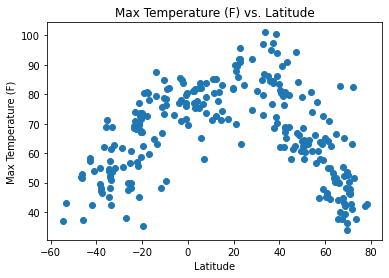

In [56]:
# Temperature (F) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Max Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature (F) vs. Latitude')
plt.savefig("Max Temperature.png")
# This first plot shows the relationship of Latitude vs. Max Temperature.
# It seems to show warmer temperatures around the Equator or 0 Latitude mark.

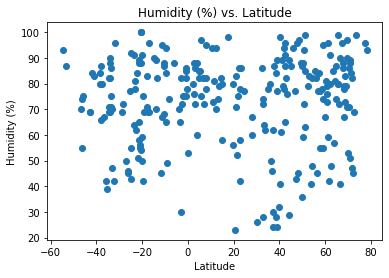

In [57]:
# Humidity (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude')
plt.savefig("Humidity.png")
# This plot shows Humidity vs. Latitude and seems to show no correlation.

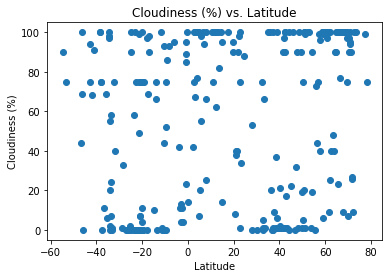

In [58]:
# Cloudiness (%) vs Latitude
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude')
plt.savefig("Cloudiness.png")
# This plot shows Cloudiness vs. Latitude and seems to have no correlation.

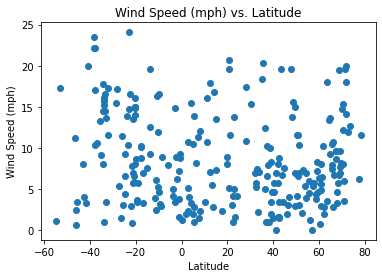

In [59]:
# Wind Speed (mph) vs. Latitude
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude')
plt.savefig("Wind Speed.png")
# This plot shows Wind Speed vs. Latitude and seems to have no correlation.

In [60]:
# # Create Northern Hemisphere dataframe
northern_hem_df = cities_df.loc[cities_df['Latitude'].astype(float) < 0, :]
northern_hem_df

,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
3,New Norfolk,-42.7826,147.0587,58.50,69,94,4.00,AU,1627433079
4,Punta Arenas,-53.1500,-70.9167,42.91,87,75,17.27,CL,1627432891
7,Chui,-33.6971,-53.4616,42.37,71,7,16.08,UY,1627433157
9,Port Alfred,-33.5906,26.8910,61.54,86,24,14.50,ZA,1627433055
11,Alofi,-19.0595,-169.9187,80.49,69,75,5.75,NU,1627433204
...,...,...,...,...,...,...,...,...,...
236,Sola,-13.8833,167.5500,79.47,89,75,9.22,VU,1627433305
241,Henties Bay,-22.1160,14.2845,56.86,84,0,2.91,NA,1627433339
243,Poum,-20.2333,164.0167,72.46,59,11,14.83,NC,1627433449
244,Cairns,-16.9167,145.7667,78.12,69,90,6.91,AU,1627433450


In [61]:
# Create Southern Hemisphere dataframe
southern_hem_df = cities_df.loc[cities_df['Latitude'].astype(float) > 0, :]
southern_hem_df

,Cities,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muros,42.7762,-9.0603,64.99,82,17,8.70,ES,1627433403
1,Kapaa,22.0752,-159.3190,85.98,75,90,3.00,US,1627433065
2,Albany,42.6001,-73.9662,68.81,91,100,1.52,US,1627432925
5,Coos Bay,43.3665,-124.2179,90.86,76,1,19.57,US,1627433404
6,Say,13.1007,2.3689,77.56,74,100,5.50,NE,1627433404
...,...,...,...,...,...,...,...,...,...
253,Clearlake,38.9582,-122.6264,93.94,24,6,1.88,US,1627433452
254,Nanortalik,60.1432,-45.2371,45.23,81,100,6.33,GL,1627433452
255,Pirovskoye,57.6267,92.2658,58.03,77,96,5.44,RU,1627433452
256,Arrondissement du Havre,49.5833,0.3333,60.57,88,90,14.97,FR,1627433351


Text(0.5, 1.0, 'Northern Hemisphere Max Temperature (F) vs Latitude')

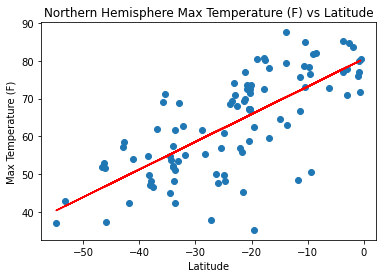

In [62]:
# Northern Hemisphere Max Temp vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Max Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere Max Temperature (F) vs Latitude')
# This plot shows that there is a moderately positive correlation between Latitude and Max Temperature in the Northern Hemisphere.
# The greater the latitude below zero, the higher the temperature.

Text(0.5, 1.0, 'Southern Hemisphere Max Temperature (F) vs Latitude')

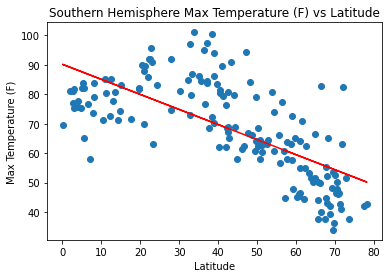

In [63]:
# Southern Hemisphere Max Temp vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Max Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere Max Temperature (F) vs Latitude')
# This plot shows there is a moderate negative correlation between Latitude and Temperature in the Southern Hemisphere.
# The greater the latitude, the lower the temperature.

Text(0.5, 1.0, 'Northern Hemisphere Humidity (%) vs Latitude')

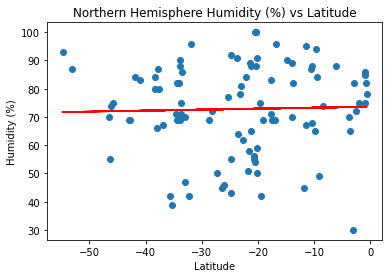

In [64]:
# Northern Hemisphere Humidity vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity (%) vs Latitude')
# This plot shows that there is no correlation between Humidity and Latitude in the Northern Hemisphere.

Text(0.5, 1.0, 'Southern Hemisphere Humidity (%) vs Latitude')

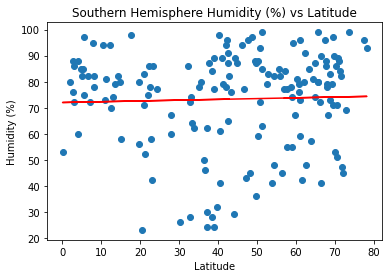

In [65]:
# Southern Hemisphere Humidity vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity (%) vs Latitude')
# This plot shows that there is no correlation between Humidity and Latitude in the Southern Hemisphere.

Text(0.5, 1.0, 'Northern Hemisphere Cloudiness (%) vs Latitude')

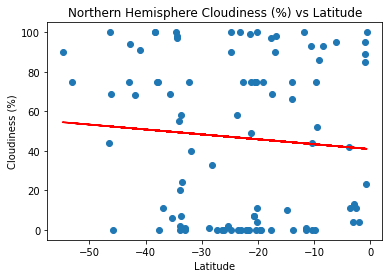

In [66]:
# Northern Hemisphere Cloudiness vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness (%) vs Latitude')
# This plot shows that there is no correlation between Cloudiness and Latitude in the Northern Hemisphere.

Text(0.5, 1.0, 'Southern Hemisphere Cloudiness (%) vs Latitude')

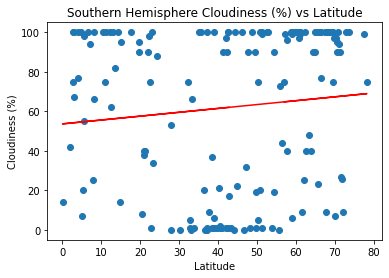

In [67]:
# Southern Hemisphere Cloudiness vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness (%) vs Latitude')
# This plot shows that there is no correlation between Cloudiness and Latitude in the Southern Hemisphere.

Text(0.5, 1.0, 'Northern Hemisphere Wind Speed (mph) vs Latitude')

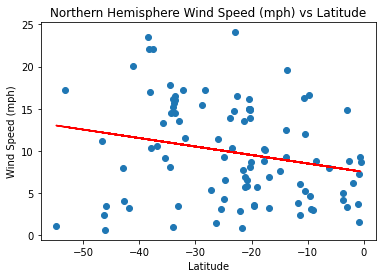

In [68]:
# Northern Hemisphere Wind Speed vs. Latitude Linear Regression
x_values = northern_hem_df['Latitude'].astype(float)
y_values = northern_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed (mph) vs Latitude')
# This plot shows that there is a weak negative correlation between Wind Speed and Latitude in the Northern Hemisphere.

Text(0.5, 1.0, 'Southern Hemisphere Wind Speed (mph) vs Latitude')

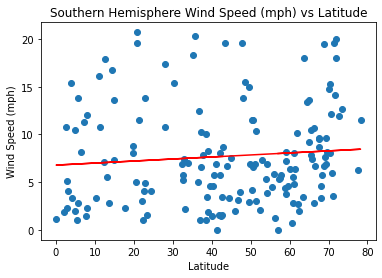

In [69]:
# Southern Hemisphere Wind Speed vs. Latitude Linear Regression
x_values = southern_hem_df['Latitude'].astype(float)
y_values = southern_hem_df['Wind Speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed (mph) vs Latitude')
# This plot shows that there is no correlation between Wind Speed and Latitude in the Southern Hemisphere.